<a href="https://colab.research.google.com/github/Amandaagambire/Galamsey-Watch/blob/main/Galamsey_watch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Earth Engine**

In [ ]:
!pip install earthengine-api geemap folium rasterio
!pip install segmentation-models-pytorch

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **Authenticate & Initialize earth engine**

In [ ]:
import ee
import geemap
import folium
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import exposure, color, feature
from PIL import Image
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import segmentation_models_pytorch as smp
from scipy import ndimage
import networkx as nx
import heapq
from flask import Flask, jsonify
from datetime import datetime

#Authenticae then initialise google Earth Engine
def initalize_earth_engine():
  ee.Authenticate()
  ee.Initialize(project = 'ee-agamaamanda')
  print("Earth Engine Initialized")


# **DATA ACQUISITION: Fetching Sentinel -2 Images**

In [ ]:

# set coordinates Region of interest  -> (Ghana)
def get_satellite_data(region, year_start, year_end)

  region = ee.Geometry.Rectangle([-3.3, 4.5, 1.3, 11.2])  # (long, lat)


  def preprocess_image(image):
      return image.select(['B4', 'B3', 'B2']).divide(10000) # Blue, Green, Red, NIR

      # Get Sentinel-2 image collection
  collection = ee.ImageCollection("COPERNICUS/S2") \
              .filterBounds(region) \
              .filterDate(f'{year_start}-01-01', f'{year_end}-12-31') \
              .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))\
              .map(preprocess_image) \
              .median() \
              # .clip(region) # Get just the region
  print("Sentinel-2 image preprocessed successfully!")

  # Display metadata
  print(collection.getInfo())


Sentinel-2 image preprocessed successfully!
{'type': 'Image', 'bands': [{'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': 0, 'max': 6.553500175476074}, 'dimensions': [6, 8], 'origin': [-4, 4], 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': 0, 'max': 6.553500175476074}, 'dimensions': [6, 8], 'origin': [-4, 4], 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': 0, 'max': 6.553500175476074}, 'dimensions': [6, 8], 'origin': [-4, 4], 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}], 'properties': {'system:footprint': {'type': 'Polygon', 'coordinates': [[[-3.3, 4.5], [1.3, 4.5], [1.3, 11.2], [-3.3, 11.2], [-3.3, 4.5]]]}}}


# **Fetching Landsat-8 Images (NECESSARY?)**



In [ ]:

# Get Landsat-8 image collection

landsat = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
            .filterBounds(region) \
            .filterDate('2022-01-01', '2024-12-31') \
            .median()

# Select RGB bands
landsat_rgb = landsat.select(['SR_B4', 'SR_B3', 'SR_B2'])

# Print metadata
print(landsat.getInfo())


{'type': 'Image', 'bands': [{'id': 'SR_B1', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': 0, 'max': 65535}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'SR_B2', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': 0, 'max': 65535}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'SR_B3', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': 0, 'max': 65535}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'SR_B4', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': 0, 'max': 65535}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'SR_B5', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': 0, 'max': 65535}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'SR_B6', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': 0, 'max': 65535}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'SR_B7', 'data_type': {

# **Vizulaize the Extraacted images**

In [ ]:

Map = geemap.Map(center = [5.2, -2.1], zoom=10)

Map.addLayer(collection, {'min': 0, 'max': 3000}, "Sentinel-2 RGB")
Map.addLayer(landsat_rgb, {'min': 0, 'max': 3000}, "Landsat-8")

#Lets see it
Map

Map(center=[5.2, -2.1], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(c…

# **Export images to Google Drive**

In [ ]:
export_task = ee.batch.Export.image.toDrive(
    image=sentinel,
    description='Sentinel2_Mining_Area',
    scale=30,
    region=region,
    fileFormat='GeoTIFF',
    folder="GEE_Exports"  # This is where the file will be saved in Drive
)

# Start the export task
export_task.start()
print("Export started! Check Google Drive → GEE_Exports folder in 5-10 minutes.")

task_list = ee.batch.Task.list()
for task in task_list:
    print(task.status())




Export started! Check Google Drive → GEE_Exports folder in 5-10 minutes.
{'state': 'READY', 'description': 'Sentinel2_Mining_Area', 'priority': 100, 'creation_timestamp_ms': 1743971429040, 'update_timestamp_ms': 1743971429040, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_IMAGE', 'id': 'LJCRBS2CXAL5OBUJLSNPC3D7', 'name': 'projects/ee-agamaamanda/operations/LJCRBS2CXAL5OBUJLSNPC3D7'}
{'state': 'COMPLETED', 'description': 'Sentinel2_Mining_Area', 'priority': 100, 'creation_timestamp_ms': 1743967216738, 'update_timestamp_ms': 1743967284244, 'start_timestamp_ms': 1743967220943, 'task_type': 'EXPORT_IMAGE', 'destination_uris': ['https://drive.google.com/#folders/1wWAF0vOQZrIwjOIpTQUW3lvEB9Zs7EIo'], 'attempt': 1, 'batch_eecu_usage_seconds': 85.83586120605469, 'id': 'F35E3D6H4OHK3LFVHKUPYB3P', 'name': 'projects/ee-agamaamanda/operations/F35E3D6H4OHK3LFVHKUPYB3P'}
{'state': 'COMPLETED', 'description': 'Sentinel2_Mining_Area', 'priority': 100, 'creation_timestamp_ms': 1743967198750, 'update_tim

In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
source_path = "/content/drive/My Drive/GEE_Exports/Sentinel2_Mining_Area.tif"
destination_path = "/content/Sentinel2_Mining_Area.tif"

# Move the file from Drive to Colab
shutil.copy(source_path, destination_path)

print(f"File moved to Colab: {destination_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File moved to Colab: /content/Sentinel2_Mining_Area.tif


# **Download & Label for training**

In [ ]:
import os

# Check if file exists in Google Colab
print(os.listdir('/content/'))


['.config', 'Sentinel2_Mining_Area.tif', 'patches', 'mining_dataset.csv', 'drive', 'sample_data']


For training purposes, we used images from the ___ satellite:

3-4 meters resolution per pixel
four channels: RGB and near infrared (NIR)
In total, we identified and labeled ASM sites in ~100 satellite images. Because of the difficulty of the task the labels had to be provided by an expert from RWTH Aachen. Since the original images were huge, we chopped them into smaller patches before feeding them into the segmentation model, so that the training data set consisted of more than 15,000 labelled images, 256-by-256 pixels each.

To make both the annotator's and the model's job easier, we computed two more channels from the four already existing ones

In [ ]:
class MiningUNet(nn.Module):
    """Custom U-Net for mining site segmentation"""
    def __init__(self):
        super().__init__()
        self.model = smp.Unet(
            encoder_name="resnet34",
            encoder_weights="imagenet",
            in_channels=4,  # RGB + NIR
            classes=1,
            activation='sigmoid'
        )

    def forward(self, x):
        return self.model(x)

def prepare_training_data(image_path):
  # Open & Read the GeoTIFF image
  with rasterio.open('/content/Sentinel2_Mining_Area.tif') as src:
      image_array = src.read()  # Convert image to NumPy array
      image_metadata = src.profile  # Get metadata

  # Print array shape -> (3, 1114, 1114) -> 3 bands (r, g,  b) anda 1114 x1114
  print(image_array.shape)
  # Print metadta
  print(image_metadata)


(3, 1114, 1114)
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 1114, 'height': 1114, 'count': 3, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.00026949458523585647, 0.0, -2.1001713027430293,
       0.0, -0.00026949458523585647, 5.500114990078595), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


# **Visualize Sattelitte Image**

Loaded image with shape: 1114 x 1114


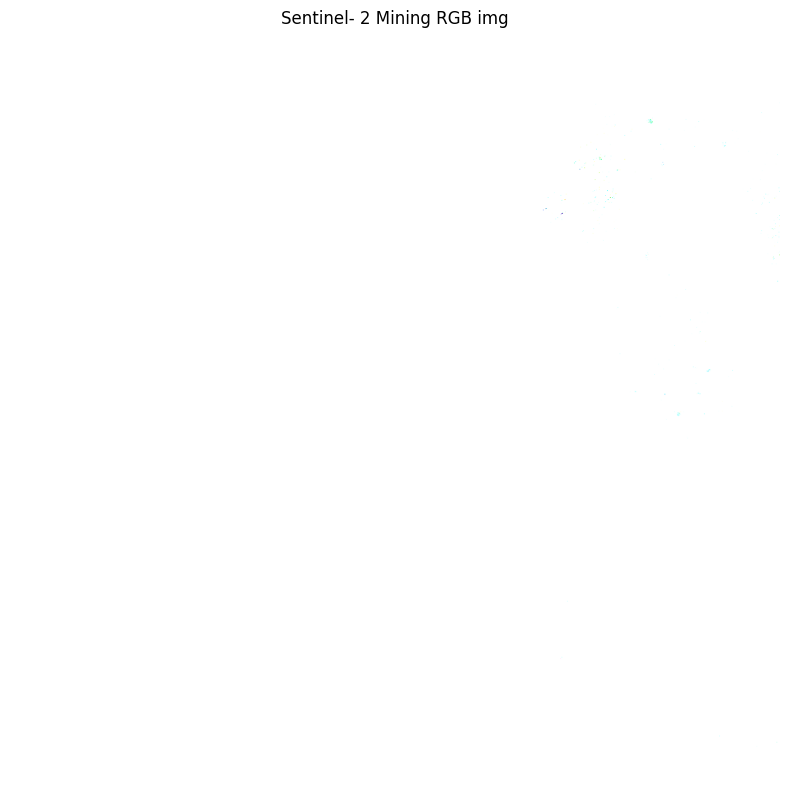

Saved patch 16 with shape: (90, 90, 3)


In [ ]:
import matplotlib.pyplot as plt

# def normalize(array):
#     return ((array - array.min()) / (array.max() - array.min()))
def normalize(band):
    band = band.astype(np.float32)
    return 255 * (band - band.min()) / (band.max() - band.min())


#lets extract the RGB
red_band = normalize(image_array[0])
green_band = normalize(image_array[1])
blue_band = normalize(image_array[2])

# Create an RGB image
rgb_img = np.dstack((red_band, green_band, blue_band))
PATCH_SIZE = 256
H, W, _ = rgb_img.shape
print(f"Loaded image with shape: {H} x {W}")

# Display the RGB image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_img)
plt.title('Sentinel- 2 Mining RGB img')
plt.axis('off')
plt.show()

# Create patch output folder
patch_folder = "patches/images"
os.makedirs(patch_folder, exist_ok=True)

# Slice image into patches
patch_id = 0
for i in range(0, H, PATCH_SIZE):
    for j in range(0, W, PATCH_SIZE):
        patch = rgb_img[i:i+PATCH_SIZE, j:j+PATCH_SIZE]

        #only save full patches
        if patch.shape[0] != PATCH_SIZE or patch.shape[1] != PATCH_SIZE:
          continue

        #save patch
        patch_img = Image.fromarray(patch.astype(np.uint8))
        patch_img.save(os.path.join(patch_folder, f"patch_{patch_id}.png"))
        patch_id += 1
print(f"Saved patch {patch_id} with shape: {patch.shape}")



# **Pre-process Image**

1. Convert image to grayscale
2. Remove clouds and shadows ->  NDVI-based filtering
3. Enhance image contrast (Histogram Equalization)
4. Extract features

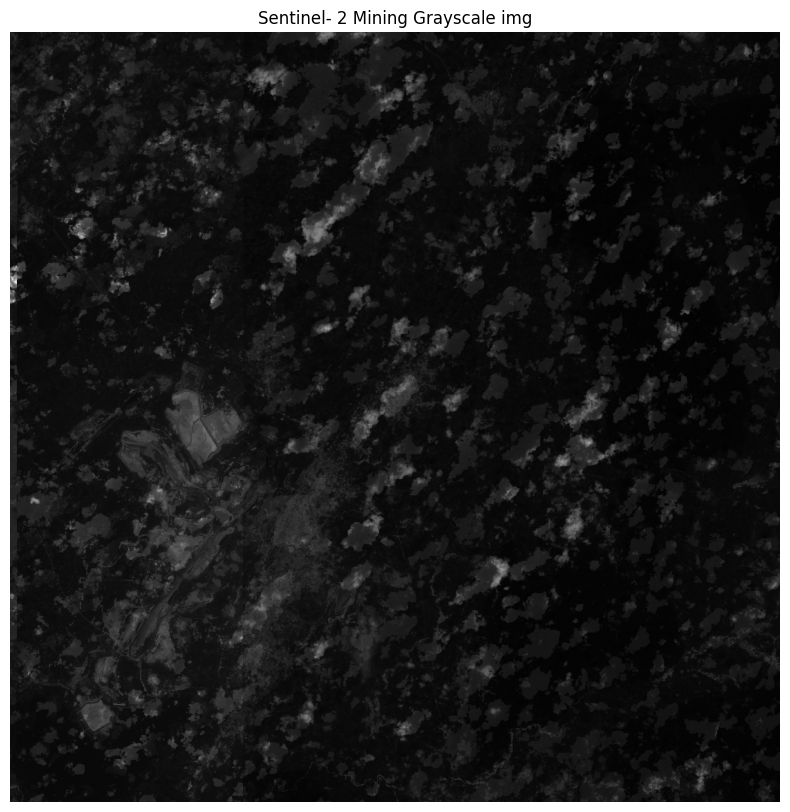

In [ ]:
from skimage.color import rgb2gray

gray_scale = rgb2gray(rgb_img)

plt.figure(figsize=(10, 10))
plt.imshow(gray_scale, cmap='gray')
plt.title('Sentinel- 2 Mining Grayscale img')
plt.axis("off")
plt.show()

# **Remove the clouds & make image clear**
NOTE: mining activities in the study area usually cause a **removal of vegetation and thecreation of dug-outs**.

Normalized Difference Vegetation Index (**NDVI**) helps detect vegetation vs. non-vegetation areas:

$$NDIV = \frac{NIR - RED}{NIR +RED}$$



*   *NIR (Near-Infrared Band, B8)* = High for vegetation
*   *RED (B4)* = Low for vegetation
* Clouds & shadows usually have*NDVI near 0 or negative*



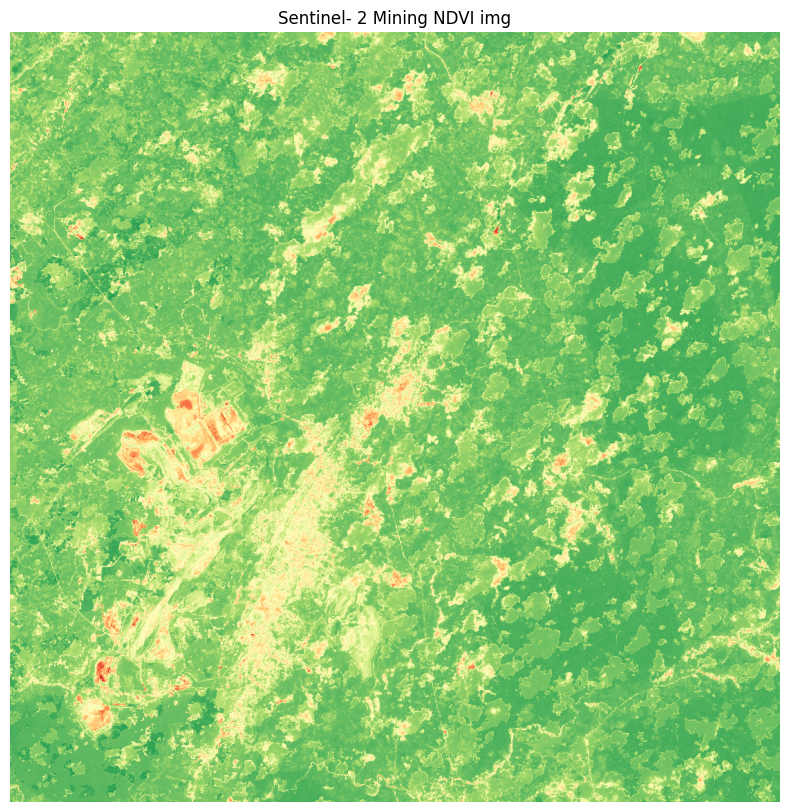

In [ ]:
nir_band = image_array[2].astype(np.float32)
red_band = image_array[0].astype(np.float32)

# Calculate NDVI
ndvi = (nir_band - red_band) / (nir_band + red_band)

#show NDVI image
plt.figure(figsize=(10, 10))
plt.imshow(ndvi, cmap='RdYlGn') # Green = vegetation, Red = bare land/ mining
plt.title('Sentinel- 2 Mining NDVI img')
plt.axis("off")
plt.show()

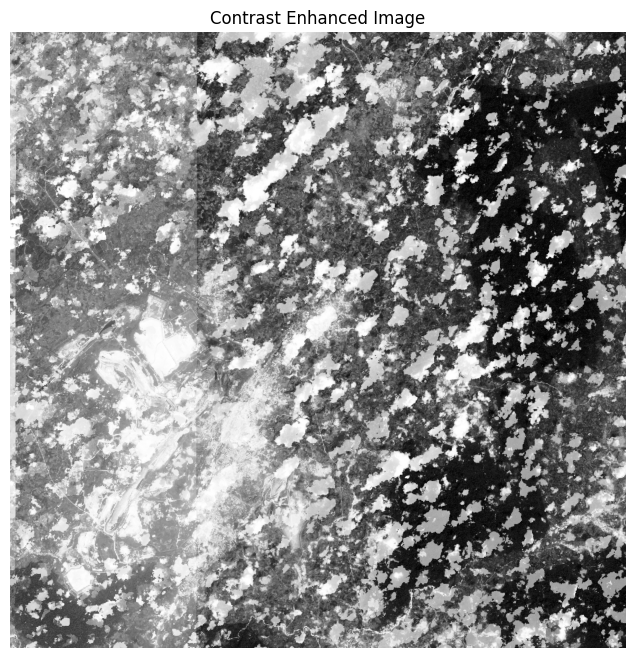

In [ ]:
from skimage import exposure

# Apply histogram equalization
equalized_image = exposure.equalize_hist(gray_scale)

# Display
plt.figure(figsize=(8, 8))
plt.imshow(equalized_image, cmap="gray")
plt.title("Contrast Enhanced Image")
plt.axis("off")
plt.show()


# **Extract Features**

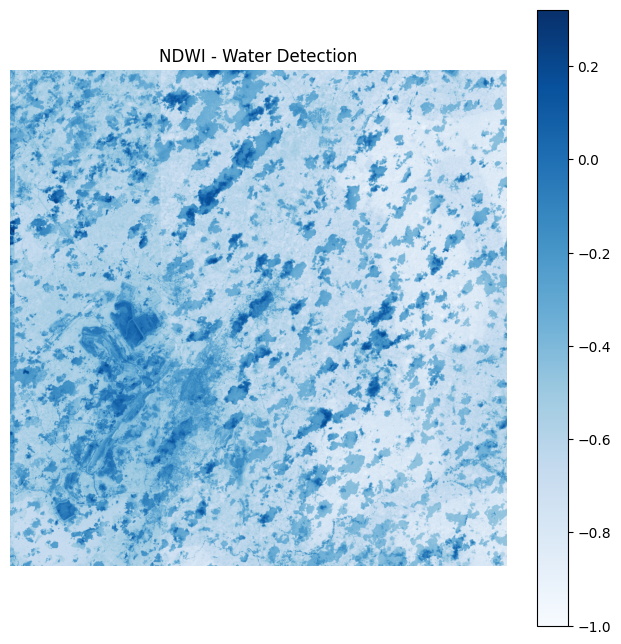

In [ ]:
# Compute NDWI
ndwi = (green_band - nir_band) / (green_band + nir_band)

# Display NDWI
plt.figure(figsize=(8, 8))
plt.imshow(ndwi, cmap="Blues")  # Blue = Water, White = Mining
plt.title("NDWI - Water Detection")
plt.colorbar()
plt.axis("off")
plt.show()


In [ ]:
from skimage.feature import graycomatrix, graycoprops

# Compute GLCM (Gray Level Co-occurrence Matrix)
glcm = graycomatrix((gray_scale * 255).astype(np.uint8), distances=[5], angles=[0], levels=256, symmetric=True, normed=True)

# Extract contrast and homogeneity
contrast = graycoprops(glcm, 'contrast')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

print(f"GLCM Contrast: {contrast}")
print(f"GLCM Homogeneity: {homogeneity}")


GLCM Contrast: 150.78337917447095
GLCM Homogeneity: 0.26722184928013537


# **Prepare Data for ML**

 Store in tabular format:  1 row = 1 pixel of the image


---



 Red Band (B4)	  - land cover differences

 Green Band (B3) - vegetation

 Blue Band (B2) -	Detects water bodies

 NDVI	 -  vegetation health inidicator

 NDWI	-  water pollution indicator(detect mining impacts)

 GLCM Contrast - land texture changes (rougher textures @ mining sites)

 GLCM Homogeneity	 -  uniformity of land surfaces


In [ ]:
import pandas as pd


# flattedn image bands to 1D arrays
red_val = image_array[0].flatten()
green_val = image_array[1].flatten()
blue_val = image_array[2].flatten()
ndvi_val = ndvi.flatten()
ndwi_val = ndwi.flatten()

#create df
df = pd.DataFrame({
    "Red": red_val,
    "Green": green_val,
    "Blue": blue_val,
    "NDVI": ndvi_val,
    "NDWI": ndwi_val,
    "GLCM_Contrast": contrast,
    "GLCM_Homogeneity": homogeneity,
    "Mining_Site": None
})
print(df.head())

# import ace_tools as tools
# tools.display_dataframe_to_user(name="Extracted Features Dataset", dataframe=df)

       Red    Green    Blue      NDVI      NDWI  GLCM_Contrast  \
0  0.20665  0.22910  0.2458  0.051520 -0.280016     150.783379   
1  0.20765  0.22860  0.2446  0.048023 -0.284508     150.783379   
2  0.21305  0.23325  0.2456  0.045261 -0.244607     150.783379   
3  0.20045  0.22280  0.2349  0.052806 -0.340632     150.783379   
4  0.19430  0.22400  0.2360  0.071002 -0.328377     150.783379   

   GLCM_Homogeneity Mining_Site  
0          0.267222        None  
1          0.267222        None  
2          0.267222        None  
3          0.267222        None  
4          0.267222        None  


# **Try: Supervised learing**
label half as mining areas & half as non mining

In [ ]:
df.loc[:250, "Mining_Site"] = 1
df.loc[251:500, "Mining_Site"] = 0

# Drop  None
df = df.dropna()

# Display updated dataset
print(df.head())

# Save dataset to CSV
csv_path = "/content/mining_dataset.csv"
df.to_csv(csv_path, index=False)

print(f"Dataset saved at: {csv_path}")


# Check if file exists in Google Colab
print(os.listdir('/content/'))



       Red    Green    Blue      NDVI      NDWI  GLCM_Contrast  \
0  0.20665  0.22910  0.2458  0.051520 -0.280016     150.783379   
1  0.20765  0.22860  0.2446  0.048023 -0.284508     150.783379   
2  0.21305  0.23325  0.2456  0.045261 -0.244607     150.783379   
3  0.20045  0.22280  0.2349  0.052806 -0.340632     150.783379   
4  0.19430  0.22400  0.2360  0.071002 -0.328377     150.783379   

   GLCM_Homogeneity Mining_Site  
0          0.267222           1  
1          0.267222           1  
2          0.267222           1  
3          0.267222           1  
4          0.267222           1  
Dataset saved at: /content/mining_dataset.csv
['.config', 'Sentinel2_Mining_Area.tif', 'mining_dataset.csv', 'drive', 'sample_data']


# **Training ML Model**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Mining_Site"])
y = df["Mining_Site"] #taget var

#80/20  train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 400 samples
Testing set size: 101 samples
